In [3]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict

In [ ]:
class BatsmanState(TypedDict):
    runs:int
    balls:int
    fours:int
    sixes:int

    sr:float
    bpb:float
    boundary_percent:float
    summary:str

In [ ]:
def calculate_sr(state:BatsmanState)->BatsmanState:
    sr=(state['runs']/state['balls'])*100
    state['sr']=round(sr,3)
    return state

def calculate_bpb(state:BatsmanState)->BatsmanState:
    bpb=(state['balls']/(state['fours']+state['sixes']))
    state['bpb']=round(bpb,3)
    return state

def calculate_boundary_percent(state:BatsmanState)->BatsmanState:
    bp=((state['fours']*4+state['sixes']*6)/state['runs'])*100
    state['boundary_percent']=round(bp,3)

    return state

def summary(state:BatsmanState)->BatsmanState:
    summary=f"""
StrikeRate:{state['sr']},
Ball_per_boundary: {state['fours']},

"""
    
    state['summary']=summary
    return state

In [19]:
graph=StateGraph(BatsmanState)

graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_boundary_percent',calculate_boundary_percent)
graph.add_node('summary',summary)

graph.add_edge(START,'calculate_sr')
graph.add_edge('calculate_sr','calculate_bpb')
graph.add_edge('calculate_bpb','calculate_boundary_percent')
graph.add_edge('calculate_boundary_percent','summary')
graph.add_edge('summary',END)

workflow=graph.compile()

In [22]:
initial_state={
    'runs':100,
    'balls':50,
    'fours':9,
    'sixes':6
}

In [23]:
final_state=workflow.invoke(initial_state)

print(final_state)

{'runs': 100, 'balls': 50, 'fours': 9, 'sixes': 6, 'sr': 200.0, 'bpb': 3.333, 'boundary_percent': 72.0}


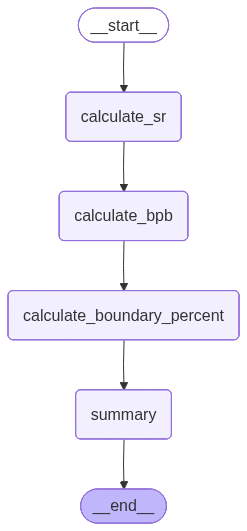

In [24]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())